# Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import load_model

### Importing the dataset

In [2]:
dataset = pd.read_excel('RP_End_all.xlsx')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass               1064 non-null   float64
 1   Standoff distance  1064 non-null   int64  
 2   Angle              1064 non-null   int64  
 3   End time           1064 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 33.4 KB


In [3]:
y = dataset['End time']
X = dataset.drop(['End time'], axis=1)
print(X.shape, y.shape)

(1064, 3) (1064,)


In [4]:
# convert to numpy array
X = np.array(X)
y = np.array(y)

### Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0)

In [6]:
X_val, X_test, y_val, y_test = train_test_split(X_test,
                                                y_test,
                                                test_size = 0.5,
                                                random_state = 0)

# Part 2 - Building the ANN

### Initializing the ANN

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=75,
                              input_shape=(X_train.shape[1],),
                              activation='softplus'))

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=55,
                              activation='softplus'))

### Adding the third hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=35,
                              activation='softplus'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1,
                              activation='linear'))

### what model looks like

In [12]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 75)                300       
                                                                 
 dense_1 (Dense)             (None, 55)                4180      
                                                                 
 dense_2 (Dense)             (None, 35)                1960      
                                                                 
 dense_3 (Dense)             (None, 1)                 36        
                                                                 
Total params: 6,476
Trainable params: 6,476
Non-trainable params: 0
_________________________________________________________________


# Part 3 - Training the ANN

### Compiling the ANN

In [13]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)
ann.compile(optimizer = opt,
            loss = 'mean_squared_error',
            metrics = ['mae'])

### early stopping callback

In [14]:
# protects from unnecessary further training of the model if a particular metric does not continue to improve over a number of n epochs. In such a case, the model training would be automatically aborted.
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

### Training the ANN model on the Training set

In [15]:
history = ann.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    callbacks=[es],
                    epochs=500,
                    batch_size=40,
                    verbose=1)

Epoch 1/500
19/19 [==============================] - 1s 21ms/step - loss: 2148.8579 - mae: 34.5723 - val_loss: 666.5652 - val_mae: 19.3795
Epoch 2/500
19/19 [==============================] - 0s 4ms/step - loss: 442.4678 - mae: 16.9621 - val_loss: 362.9479 - val_mae: 17.4209
Epoch 3/500
19/19 [==============================] - 0s 5ms/step - loss: 270.8871 - mae: 13.3626 - val_loss: 239.4028 - val_mae: 11.6680
Epoch 4/500
19/19 [==============================] - 0s 5ms/step - loss: 205.3712 - mae: 11.2464 - val_loss: 189.7291 - val_mae: 10.2194
Epoch 5/500
19/19 [==============================] - 0s 5ms/step - loss: 163.5563 - mae: 9.6737 - val_loss: 160.7848 - val_mae: 9.8095
Epoch 6/500
19/19 [==============================] - 0s 4ms/step - loss: 156.9801 - mae: 9.2796 - val_loss: 145.8017 - val_mae: 9.2073
Epoch 7/500
19/19 [==============================] - 0s 5ms/step - loss: 148.1233 - mae: 8.9274 - val_loss: 134.7165 - val_mae: 8.3874
Epoch 8/500
19/19 [==========================

### Analyse learn history

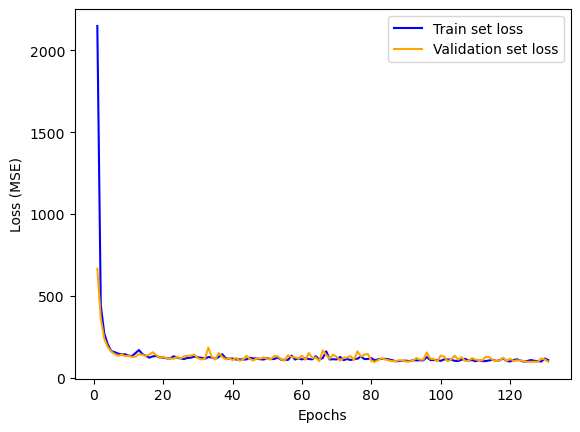

In [16]:
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Train set loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation set loss')
#plt.title('Training and testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

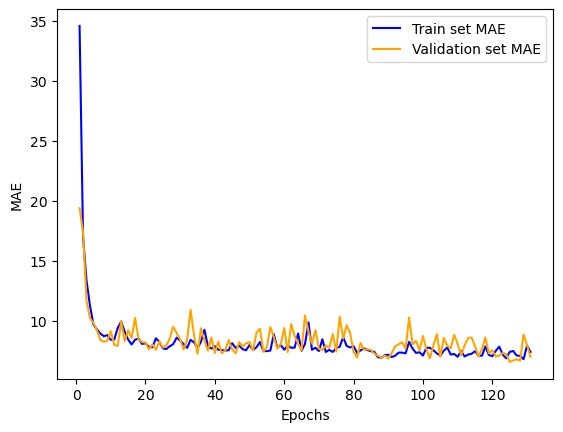

In [17]:
loss_values1 = history_dict['mae'] # you can change this
val_loss_values1 = history_dict['val_mae'] # you can also change this
epochs = range(1, len(loss_values1) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values1, 'blue', label='Train set MAE')
plt.plot(epochs, val_loss_values1, 'orange', label='Validation set MAE')
#plt.title('Training and testing MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [ ]:
print (epochs)

### Save the model

In [ ]:
ann.save('End_ANN_model_8.h5')

# Part 4 - Make predictions

In [ ]:
ann = load_model('End_ANN_model_8.h5')

5/5 [==============================] - 0s 4ms/step


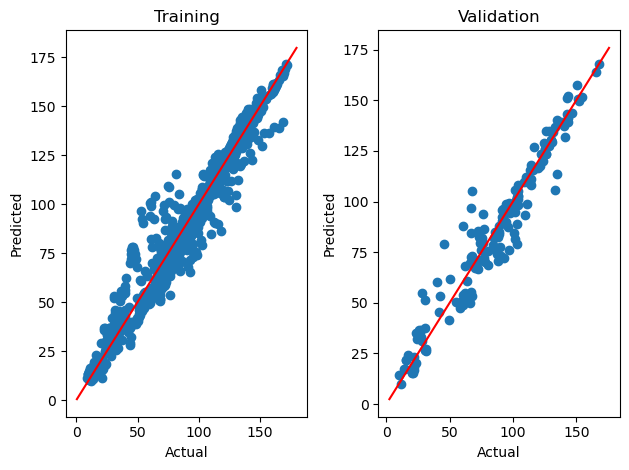

In [18]:
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=ann.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_val, y=ann.predict(X_val)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [19]:
y_pred = ann.predict(X_test)
y_pred_e = y_pred*1000
y_test_e = y_test*1000
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_e.reshape(len(y_pred_e),1), y_test_e.reshape(len(y_test_e),1)),1))

5/5 [==============================] - 0s 4ms/step
[[ 52991.66  62082.17]
 [119322.05 118705.03]
 [ 19723.82  19918.27]
 [ 91590.9   85280.96]
 [ 75187.83 100892.04]
 [ 74852.87  70371.4 ]
 [130647.08 129593.28]
 [144176.19 135374.54]
 [ 85825.98  97821.29]
 [ 71409.34  74064.65]
 [129461.35 135477.53]
 [132377.59 123803.04]
 [ 58414.02  63722.84]
 [ 15524.91  21129.82]
 [114754.11 113482.71]
 [ 65038.95  40915.38]
 [ 84492.88  71398.19]
 [138865.06 142612.08]
 [ 68989.14  71788.53]
 [ 51490.05  58323.94]
 [ 40413.78  41561.83]
 [104111.72  66848.97]
 [ 94418.17  53350.37]
 [ 94875.55  77534.54]
 [121886.   119419.81]
 [130957.56 127547.99]
 [ 68359.34  83002.09]
 [144366.08 136830.78]
 [ 71472.2   77006.9 ]
 [151789.12 155097.73]
 [ 91539.43  91714.67]
 [128922.18 133929.58]
 [128691.05 122841.48]
 [ 96608.08 116087.94]
 [121157.62 119917.94]
 [104818.03 100623.83]
 [ 20279.77  20306.58]
 [108666.54 109506.55]
 [ 86030.99  87980.7 ]
 [ 70388.9   77089.7 ]
 [ 70452.95  66115.12]
 [ 884

Text(0, 0.5, 'Predicted data')

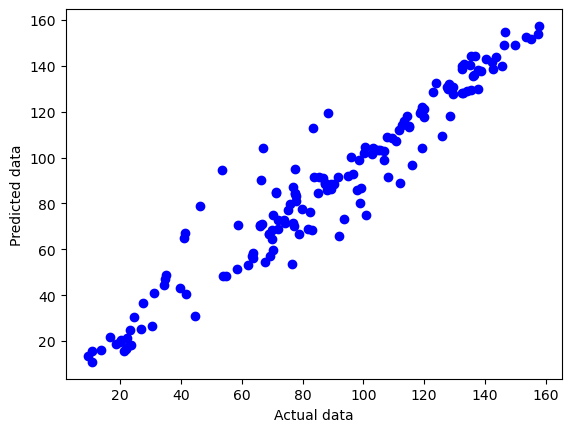

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred, color="blue")
#plt.plot ([0,0.13],[0,0.13], color = "red")
#plt.axis ([0,0.13,0,0.13])
plt.xlabel ('Actual data')
plt.ylabel ('Predicted data')

In [ ]:
from sklearn.metrics import r2_score
# Initialize layout
fig1, ax1 = plt.subplots(figsize = (9, 9))
b_l = 20
u_l = 50

# Add scatterplot
ax1.scatter(y_test_e, y_pred_e, s=70, alpha=1, edgecolors="k",c='mediumblue',zorder=5, label = 'Points')


plt.ylabel('Predicted End Time (ms)',fontsize = 25)
plt.xlabel('Actual End Time (ms)',fontsize = 25)
plt.xticks(fontsize = 19)
plt.yticks(fontsize = 19)


x1 = np.linspace(b_l, u_l)

plt.plot(x1, x1, 'Red', label='45\N{DEGREE SIGN} line',lw=2.5,alpha=1)
plt.plot(x1, 1.05*x1, '--m', label='\u00B15% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.95*x1,'m', linestyle='--',lw=2.5,alpha=0.7)
plt.plot(x1, 1.1*x1, '-.g', label='\u00B110% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.9*x1,'-.g',lw=2.5,alpha=0.7)
plt.plot(x1, 1.2*x1, color = '#F97306', linestyle='dotted', label='\u00B120% Error',lw=2.5,alpha=0.7)
plt.plot(x1, 0.8*x1,color = '#F97306', linestyle='dotted', lw=2.5,alpha=0.7)

plt.ylim(b_l, u_l)
plt.xlim(b_l, u_l)
plt.legend(loc='upper left',fontsize = 25)

plt.grid()

ax1.spines['left'].set_color('black')        # setting up Y-axis tick color to red
ax1.spines['bottom'].set_color('black')         #setting up above X-axis tick color to red


In [ ]:
# metrics


trainpreds = ann.predict(X_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, y_pred)) # test

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print (r2)

In [ ]:
r2_train = r2_score(y_train, trainpreds)
print (r2_train)

In [ ]:
count0 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.95*y_test[i]
    line2 = y_pred[i] - 1.05*y_test[i]
    mask0 = (line1 > 0) & (line2 < 0)
    count0 = np.sum(mask0+count0)

count1 = 0
for i in range(len(y_pred)):
    line1 = y_pred[i] - 0.9*y_test[i]
    line2 = y_pred[i] - 1.1*y_test[i]
    mask1 = (line1 > 0) & (line2 < 0)
    count1 = np.sum(mask1+count1)

count2 = 0
for j in range(len(y_pred)):
    line3 = y_pred[j] - 0.8*y_test[j]
    line4 = y_pred[j] - 1.2*y_test[j]
    mask2 = (line3 > 0) & (line4 < 0)
    count2 = np.sum(mask2+count2)


count3 = 0    
for k in range(len(y_pred)):
    line5 = y_pred[k] - 0.8*y_test[k]
    line6 = y_pred[k] - 1.2*y_test[k]
    mask3 = (line5 < 0) or (line6 > 0)
    count3 = np.sum(mask3+count3)
   

print ('Within 5% margin', format((count0/len (y_pred)),'.2%'))
print ('Within 10% margin', format((count1/len (y_pred)),'.2%'))
print ('Within 20% margin', format((count2/len (y_pred)),'.2%'))
print ('Out of 20% margin', format((count3/len (y_pred)),'.2%'))

In [ ]:
adj_r2 = 1 - ((1 - r2) * (len(X_test) - 1) / (len(X_test) - len (X_test[0]) - 1))
print (adj_r2)

In [ ]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

# Part 5 - Use model

## Import libraries

In [ ]:
from keras.models import load_model
import numpy as np

## Load model

In [ ]:
ann = load_model('End_ANN_model_8.h5')

## Prediction

In [ ]:
charge_mass = 20
standoff_distance = 6.3
arr = np.array ([[charge_mass,standoff_distance]])
print (arr)
np.set_printoptions(precision=9)
end_time = ann.predict(arr)
print (end_time)
%store end_time